In [425]:
import numpy as np
import pandas as pnd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, make_scorer,mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_validate

In [452]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz 
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler

In [3]:
import warnings
warnings.filterwarnings("ignore")

# 1. Wine dataset

In [4]:
wines = pnd.read_csv('Desktop\wine_quality.csv')

In [5]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,top_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,0


In [6]:
wines.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
top_quality             0
dtype: int64

In [7]:
wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
top_quality               int64
dtype: object

In [8]:
X = wines.iloc[:, :-1]
y = wines.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2019)

In [10]:
algLR = LogisticRegression()
algNB = GaussianNB()
algKNN = KNeighborsClassifier()
algDT = DecisionTreeClassifier()

In [11]:
modelLR = algLR.fit(X_train, y_train)
modelNB = algNB.fit(X_train, y_train)
modelKNN = algKNN.fit(X_train, y_train)
modelDT = algDT.fit(X_train, y_train)
models = [modelLR, modelNB, modelKNN, modelDT]

In [12]:
modelLR.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [13]:
def print_performance(y, y_hat):
    print(f'Accuracy: {accuracy_score(y, y_hat)}')
    print(f'Precision: {precision_score(y, y_hat)}')
    print(f'Recall: {recall_score(y, y_hat)}')
    print(f'F1: {f1_score(y, y_hat)}')

In [14]:
for model in models:
    print(f"MODEL: {model}")
    print()
    print("Confusion matrix:")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_true=y_test,  y_pred = y_pred))
    print()
    print("Metrics:")
    print_performance(y_test, y_pred)
    print()
    print()

MODEL: LogisticRegression()

Confusion matrix:
[[1110   39]
 [ 249   72]]

Metrics:
Accuracy: 0.8040816326530612
Precision: 0.6486486486486487
Recall: 0.22429906542056074
F1: 0.3333333333333333


MODEL: GaussianNB()

Confusion matrix:
[[843 306]
 [ 98 223]]

Metrics:
Accuracy: 0.7251700680272108
Precision: 0.4215500945179584
Recall: 0.6947040498442367
F1: 0.5247058823529411


MODEL: KNeighborsClassifier()

Confusion matrix:
[[1036  113]
 [ 202  119]]

Metrics:
Accuracy: 0.7857142857142857
Precision: 0.5129310344827587
Recall: 0.3707165109034268
F1: 0.43037974683544306


MODEL: DecisionTreeClassifier()

Confusion matrix:
[[1015  134]
 [ 123  198]]

Metrics:
Accuracy: 0.8251700680272109
Precision: 0.5963855421686747
Recall: 0.616822429906542
F1: 0.6064318529862175




In [15]:
def eval_cross_val(models, X, y):
    folds = KFold(n_splits=10)
    for model in models:
        i = 1
        results = []
        print(f"MODEL: {model}")
        for train_index, test_index in folds.split(X):
            X_train, y_train  = X.loc[train_index, :], y[train_index]
            X_test, y_test = X.loc[test_index], y[test_index]

            model.fit(X_train, y_train)

            y_pred = model.predict(X_test)
            results.append(accuracy_score(y_test, y_pred))
            print(f"{i} Iteration - Accuracy: {accuracy_score(y_test, y_pred)}")
            i = i +1
        print(f"Average accuracy for model {model}: {round(np.mean(results), 2)}, "
              f"and standard deviation of prediction error {round(np.std(results)*100, 2)}%")
        print()

In [16]:
eval_cross_val(models, X, y)

MODEL: LogisticRegression()
1 Iteration - Accuracy: 0.8306122448979592
2 Iteration - Accuracy: 0.7408163265306122
3 Iteration - Accuracy: 0.7489795918367347
4 Iteration - Accuracy: 0.8326530612244898
5 Iteration - Accuracy: 0.8693877551020408
6 Iteration - Accuracy: 0.7877551020408163
7 Iteration - Accuracy: 0.7408163265306122
8 Iteration - Accuracy: 0.8
9 Iteration - Accuracy: 0.8159509202453987
10 Iteration - Accuracy: 0.7566462167689162
Average accuracy for model LogisticRegression(): 0.79, and standard deviation of prediction error 4.26%

MODEL: GaussianNB()
1 Iteration - Accuracy: 0.8142857142857143
2 Iteration - Accuracy: 0.7714285714285715
3 Iteration - Accuracy: 0.7428571428571429
4 Iteration - Accuracy: 0.8040816326530612
5 Iteration - Accuracy: 0.763265306122449
6 Iteration - Accuracy: 0.726530612244898
7 Iteration - Accuracy: 0.6693877551020408
8 Iteration - Accuracy: 0.6918367346938775
9 Iteration - Accuracy: 0.6441717791411042
10 Iteration - Accuracy: 0.6339468302658486
Av

In [17]:

for model in models:
    print(f"MODEL: {model}")
    print()
    results = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'], return_train_score = True)
    print("           TEST   TRAIN")
    print(f"Accuracy:  {round(np.mean(results['test_accuracy']), 2)},   {round(np.mean(results['train_accuracy']), 2)}")
    print(f"Precision: {round(np.mean(results['test_precision']), 2)},   {round(np.mean(results['train_precision']), 2)}")
    print(f"Recall:    {round(np.mean(results['test_recall']), 2)},   {round(np.mean(results['train_recall']), 2)}")
    print()

MODEL: LogisticRegression()

           TEST   TRAIN
Accuracy:  0.8,   0.8
Precision: 0.66,   0.59
Recall:    0.23,   0.22

MODEL: GaussianNB()

           TEST   TRAIN
Accuracy:  0.73,   0.73
Precision: 0.44,   0.42
Recall:    0.71,   0.71

MODEL: KNeighborsClassifier()

           TEST   TRAIN
Accuracy:  0.75,   0.86
Precision: 0.41,   0.73
Recall:    0.28,   0.55

MODEL: DecisionTreeClassifier()

           TEST   TRAIN
Accuracy:  0.74,   1.0
Precision: 0.41,   1.0
Recall:    0.42,   1.0



'''Na osnovu dobijenih metrika moze se zakljuciti da modele dobijene logistickom regresijom, kao i Naivnim Bajesom,
ne karakterisu visoka pristrasnost i varijansa, dok se kod modela dobijenih KNN metodom i stablom odlucivanja primecuje
razlika u metrikama za train i test deo, tako da se moze reci da postoji prenaucenost modela.
'''

'''S obzirom da se navedeni modeli bave otkrivanjem visokokvalitetnih vina, tj pozitivna klasa su top_vina,
moze se smatrati da daleko veci trosak nastaje ukoliko model propusti da vino vrhunskog kvaliteta svrsta u grupu
top_wines, nego ukoliko vino loseg kvaliteta svrsta u ovu grupu. Iz tog razloga moze se smatrati da je najbitnija
metrika ODZIV (RECALL) jer stavlja u odnost broj visokokvalitetnih vina koji su svrstani u klasu top_wines
i ukupan broj visokokvalitetnih vina. Cilj nam je da nam sto manje vina visokog kvaliteta "promakne".
Skuplje greske su FN, nego FP.
'''

In [20]:
for model in models:
    print(f"MODEL: {model}")
    print()
    print("Confusion matrix - treshold 0.5:")
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_true=y_test,  y_pred = y_pred))
    print()
    print("Confusion matrix - treshold 0.3:")
    y_pred = model.predict_proba(X_test)
    print(confusion_matrix(y_true=y_test,  y_pred = y_pred[:,1]>0.3))
    print()

MODEL: LogisticRegression()

Confusion matrix - treshold 0.5:
[[1085   64]
 [ 236   85]]

Confusion matrix - treshold 0.3:
[[905 244]
 [135 186]]

MODEL: GaussianNB()

Confusion matrix - treshold 0.5:
[[826 323]
 [ 94 227]]

Confusion matrix - treshold 0.3:
[[717 432]
 [ 72 249]]

MODEL: KNeighborsClassifier()

Confusion matrix - treshold 0.5:
[[1058   91]
 [ 140  181]]

Confusion matrix - treshold 0.3:
[[923 226]
 [ 67 254]]

MODEL: DecisionTreeClassifier()

Confusion matrix - treshold 0.5:
[[1127   22]
 [  19  302]]

Confusion matrix - treshold 0.3:
[[1127   22]
 [  19  302]]



In [534]:
params = []
str = f"{wines.columns[-1]} = 1/(1+e^-("
for att, coef in zip(wines.columns, modelLR.coef_[0]):
    str1 = f"+({round(coef, 2)} * {att})"
    str = str + str1
    params.append([att, coef])
    str = str + ")"
print(str)

top_quality = 1/(1+e^-(+(-0.35 * fixed acidity))+(-2.97 * volatile acidity))+(-0.31 * citric acid))+(0.03 * residual sugar))+(-0.53 * chlorides))+(0.01 * free sulfur dioxide))+(-0.0 * total sulfur dioxide))+(-1.77 * density))+(-1.25 * pH))+(1.91 * sulphates))+(0.82 * alcohol))


In [535]:
params

[['fixed acidity', -0.3537898294875517],
 ['volatile acidity', -2.967000266545313],
 ['citric acid', -0.30873701344485405],
 ['residual sugar', 0.03285325581354623],
 ['chlorides', -0.5282165254889651],
 ['free sulfur dioxide', 0.012329685489174153],
 ['total sulfur dioxide', -0.004581403911404523],
 ['density', -1.7701873386847182],
 ['pH', -1.2533589967987568],
 ['sulphates', 1.9055887826657436],
 ['alcohol', 0.8153638900215592]]

In [517]:
params.sort(key=lambda x: -abs(x[1]))

In [518]:
params

[['volatile acidity', -2.967000266545313],
 ['sulphates', 1.9055887826657436],
 ['density', -1.7701873386847182],
 ['pH', -1.2533589967987568],
 ['alcohol', 0.8153638900215592],
 ['chlorides', -0.5282165254889651],
 ['fixed acidity', -0.3537898294875517],
 ['citric acid', -0.30873701344485405],
 ['residual sugar', 0.03285325581354623],
 ['free sulfur dioxide', 0.012329685489174153],
 ['total sulfur dioxide', -0.004581403911404523]]

# 2. Insurance dataset

In [25]:
insurance = pnd.read_csv('Desktop\insurance.csv')

In [26]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [27]:
insurance.shape

(1338, 7)

In [28]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [29]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

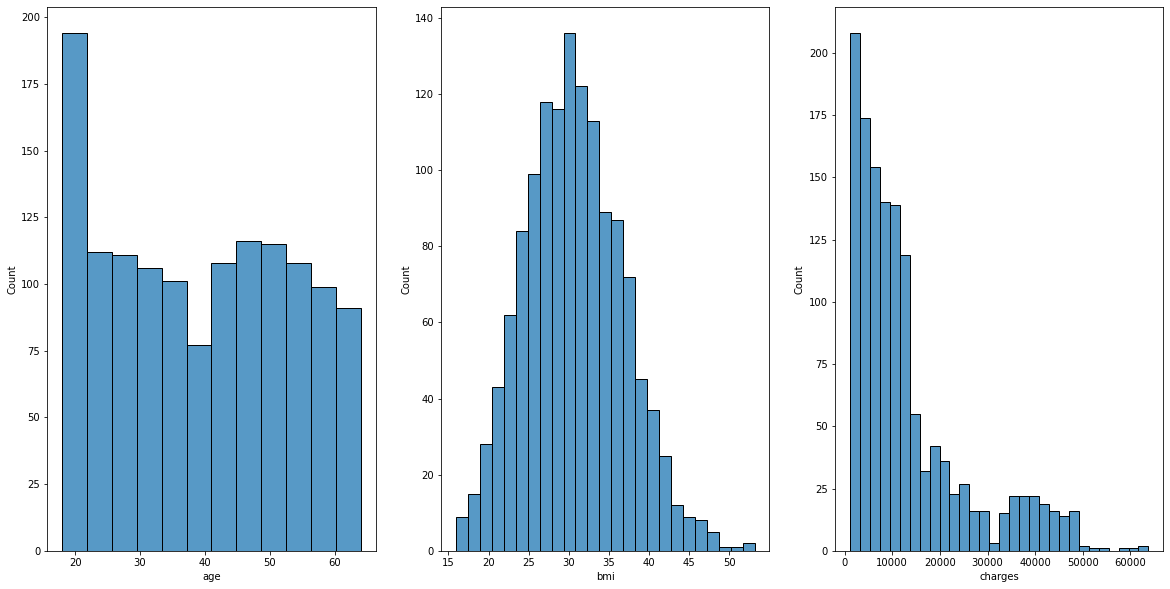

In [30]:
%matplotlib inline
fig,axes = plt.subplots(1,3,figsize = (20,10))

sns.histplot(insurance['age'], ax=axes[0])
sns.histplot(insurance['bmi'], ax=axes[1])
sns.histplot(insurance['charges'], ax=axes[2])

plt.show()

#insurance['age'].hist(bins = 25)
#insurance['bmi'].hist(bins = 25)
#insurance['children'].hist(bins = 25)
#insurance['charges'].hist(bins = 25)

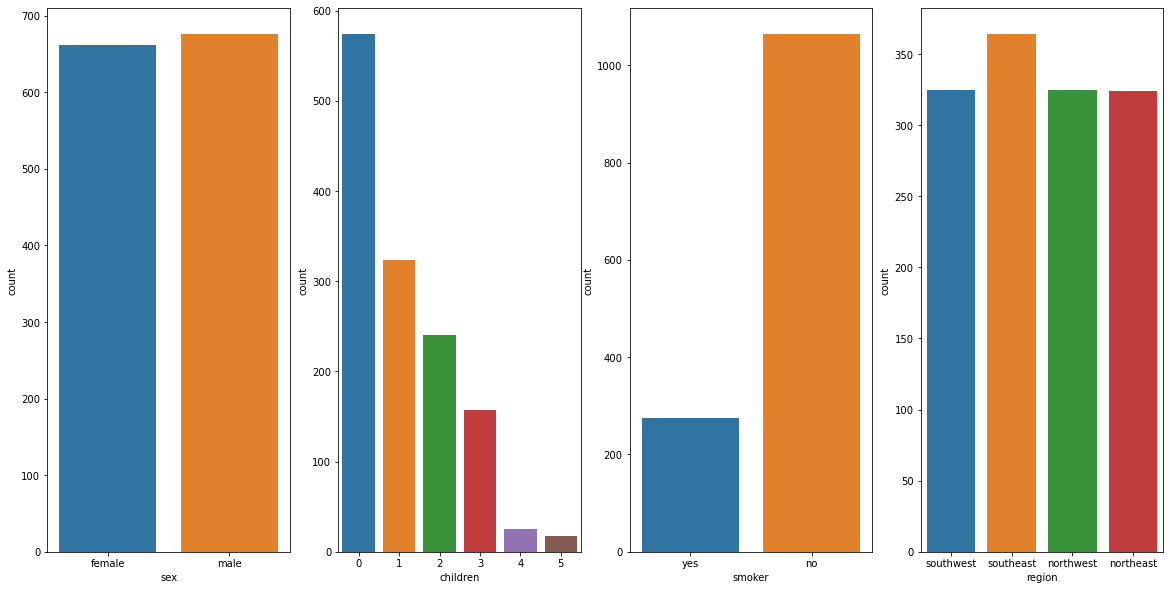

In [31]:
fig,axes = plt.subplots(1,4,figsize = (20,10))

sns.countplot(x = 'sex', data = insurance, ax=axes[0])
sns.countplot(x = 'children', data = insurance, ax=axes[1])
sns.countplot(x = 'smoker', data = insurance, ax=axes[2])
sns.countplot(x = 'region', data = insurance, ax=axes[3])

plt.show()

## Pipeline

In [73]:
def rmse_score(y_true, y_predict):
    diff = y_true-y_predict
    diff_squared = np.power(diff,2)
    mse = diff_squared.mean()
    rmse = np.sqrt(mse)
    return(rmse)

def error_stats(cv_dict):
    stats = {}
    for k,v in cv_dict.items(): 
        stats.update({k:(v.mean(), v.std())})
    return(stats)

rmse = make_scorer(rmse_score, greater_is_better=False)

In [418]:
def stats(y_true, y_predict):
    MAE = mean_absolute_error(y_true,y_predict)
    MSE = mean_squared_error(y_true, y_predict)
    RMSE = np.sqrt(mean_squared_error(y_true, y_predict))
    R2 = r2_score(y_true, y_predict)
    
    print('MAE:', MAE)
    print('MSE:', MSE)
    print('RMSE:', RMSE)
    print('R2:', R2)
    
    return {'MAE' : MAE, 'MSE' : MSE, 'RMSE' : RMSE, 'R2':R2}

In [382]:
X = insurance.iloc[:,:-1]
y = insurance.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [383]:
X_train

,age,sex,bmi,children,smoker,region
322,34,male,30.800,0,yes,southwest
1072,21,male,31.255,0,no,northwest
690,21,male,27.360,0,no,northeast
461,42,male,30.000,0,yes,southwest
32,19,female,28.600,5,no,southwest
...,...,...,...,...,...,...
355,46,male,27.600,0,no,southwest
292,25,male,45.540,2,yes,southeast
135,22,female,28.050,0,no,southeast
554,25,female,41.325,0,no,northeast


In [384]:
X_train.shape, X_test.shape

((1003, 6), (335, 6))

In [385]:
categorical_cols = list(X_train.select_dtypes(include = 'object').columns)
numerical_cols = list(X_train.select_dtypes(exclude = 'object').columns)
categorical_cols, numerical_cols

(['sex', 'smoker', 'region'], ['age', 'bmi', 'children'])

In [386]:
numerical_preparation = SimpleImputer(strategy='median')
 
catagorical_preparation = Pipeline(steps=[
                                    ('imputer',SimpleImputer(strategy='most_frequent')),
                                    ('onehot',OneHotEncoder(handle_unknown='ignore', sparse = False))
                                    ]
                                  )

In [519]:
#catagorical_preparation.fit(X_train, y_train).transform(X_train)

In [521]:
preprocessor = ColumnTransformer(transformers=[
                                     ('num',numerical_preparation,numerical_cols),
                                     ('cat',catagorical_preparation,categorical_cols)
                                 ]
                                )

In [389]:
DT = DecisionTreeRegressor()#(max_depth = 5, min_samples_split = 10)

my_pipeline =Pipeline(steps = [
                         ('preprocessor',preprocessor),
                         ('dt',DT)
                         ]
                     )

In [390]:
y_fit = my_pipeline.fit(X_train, y_train)

In [391]:
y_fit.score(X_train, y_train)

0.9987637959215749

In [525]:
cv_dict = cross_validate(y_fit, X_train, y_train, cv = 10, scoring={'MAE':'neg_mean_absolute_error', 'RMSE':rmse, 'R2':'r2'})
error_stats(cv_dict)

{'fit_time': (0.012372612953186035, 0.0014916270921013085),
 'score_time': (0.005189061164855957, 0.0007499745337166023),
 'test_MAE': (-3124.380801724198, 527.7303020164147),
 'test_RMSE': (-6566.673739929494, 784.026608027256),
 'test_R2': (0.6907271286804522, 0.08173665658349503)}

In [392]:
y_hat = y_fit.predict(X_test)

In [315]:
#y_hat

(0.0, 55000.0)

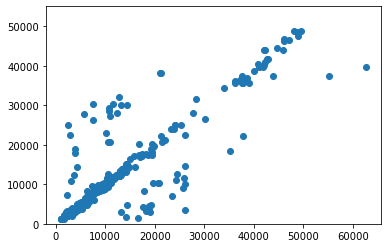

In [393]:
plt.scatter(y_test, y_hat)
ax = plt.gca()
ax.set_ylim([0, 55000])

In [395]:
data = {'y_test': y_test,
        'y_hat':y_hat}
  
df = pnd.DataFrame(data)

df

,y_test,y_hat
397,16586.49771,1515.34490
338,41919.09700,39727.61400
918,13041.92100,13451.12200
1271,3021.80915,2534.39375
933,7348.14200,7345.08400
...,...,...
374,1391.52870,1136.39940
717,13112.60480,30166.61817
464,1632.03625,1632.56445
863,5458.04645,4500.33925


In [526]:
stats1 = stats(y_test,y_hat)

MAE: 2780.8034081761193
MSE: 37444023.97650862
RMSE: 6119.152226943584
R2: 0.7380106277423193


[Text(128.69935281644135, 212.004, 'X[5] <= 0.5\nmse = 147749206.016\nsamples = 1003\nvalue = 13297.443'),
 Text(39.79895473393227, 201.132, 'X[1] <= 30.01\nmse = 130303746.454\nsamples = 211\nvalue = 31719.521'),
 Text(18.37987214927436, 190.26, 'X[0] <= 41.0\nmse = 24836372.605\nsamples = 101\nvalue = 21231.668'),
 Text(8.64765031098825, 179.388, 'X[0] <= 29.5\nmse = 8624864.667\nsamples = 57\nvalue = 18119.165'),
 Text(3.9719419488597096, 168.516, 'X[1] <= 21.727\nmse = 2884085.569\nsamples = 35\nvalue = 16680.392'),
 Text(1.2340013821700069, 157.644, 'X[0] <= 25.5\nmse = 1098944.406\nsamples = 7\nvalue = 14386.323'),
 Text(0.6170006910850034, 146.772, 'X[1] <= 18.905\nmse = 352167.544\nsamples = 5\nvalue = 13855.437'),
 Text(0.3085003455425017, 135.9, 'mse = 0.0\nsamples = 1\nvalue = 12829.455'),
 Text(0.9255010366275052, 135.9, 'X[0] <= 21.5\nmse = 111259.96\nsamples = 4\nvalue = 14111.932'),
 Text(0.6170006910850034, 125.02799999999999, 'X[3] <= 0.5\nmse = 54319.071\nsamples = 3\

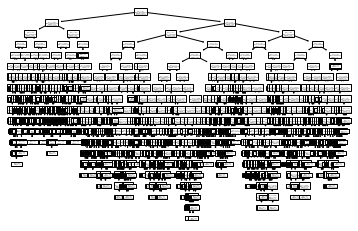

In [426]:
plot_tree(DT)

## 2 pipeline

In [398]:
parameters={
    'dt__splitter':["best","random"],
    'dt__max_depth' : [1,2,3,4,5],
    'dt__min_samples_leaf':[3,5,7,9,11,13,15]}

In [399]:
#tuning_model = GridSearchCV(my_pipeline,param_grid = parameters, scoring={'MAE':'neg_mean_absolute_error', 'RMSE':rmse, 'R2':'r2'},refit=False,cv=10)
tuning_model = GridSearchCV(my_pipeline,param_grid = parameters, scoring='r2',cv=10)

In [400]:
tuning_modelFit = tuning_model.fit(X_train, y_train)

In [401]:
bestR2 = tuning_modelFit.best_score_
bestR2

0.8432780918925605

In [402]:
bestParams = tuning_modelFit.best_params_
bestParams

{'dt__max_depth': 5, 'dt__min_samples_leaf': 11, 'dt__splitter': 'best'}

In [527]:
DTOpt = DecisionTreeRegressor(max_depth = 5, min_samples_leaf =11, splitter = 'best')
my_pipelineOpt =Pipeline(steps = [
                         ('preprocessor',preprocessor),
                         ('dt',DTOpt)
                         ]
                     )

cv_dictOpt = cross_validate(my_pipelineOpt, X_train, y_train, cv = 10, scoring={'MAE':'neg_mean_absolute_error', 'RMSE':rmse, 'R2':'r2'})
error_stats(cv_dictOpt)

{'fit_time': (0.0103759765625, 0.0014229013595732265),
 'score_time': (0.005088996887207031, 0.0007028425708646715),
 'test_MAE': (-2651.1430072279004, 304.1947231888659),
 'test_RMSE': (-4619.166849729152, 645.6979508356153),
 'test_R2': (0.8432780918925606, 0.05132428066514047)}

In [528]:
y_hat_DTOpt = my_pipelineOpt.fit(X_train, y_train).predict(X_test)

(0.0, 65000.0)

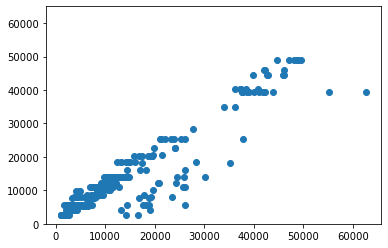

In [529]:
plt.scatter(y_test, y_hat_DTOpt)
ax = plt.gca()
ax.set_ylim([0, 65000])

In [530]:
dataOpt = {'y_test': y_test,
        'y_hat':y_hat_DTOpt}
  
dfOpt = pnd.DataFrame(dataOpt)

dfOpt

,y_test,y_hat
397,16586.49771,2533.063837
338,41919.09700,39545.981878
918,13041.92100,13947.943918
1271,3021.80915,4224.434537
933,7348.14200,11089.016025
...,...,...
374,1391.52870,2533.063837
717,13112.60480,18401.712334
464,1632.03625,2533.063837
863,5458.04645,5417.449137


In [531]:
stats2 = stats(y_test,y_hat_DTOpt)

MAE: 2580.97935100273
MSE: 18962949.502745308
RMSE: 4354.6468861143385
R2: 0.8673195156723756


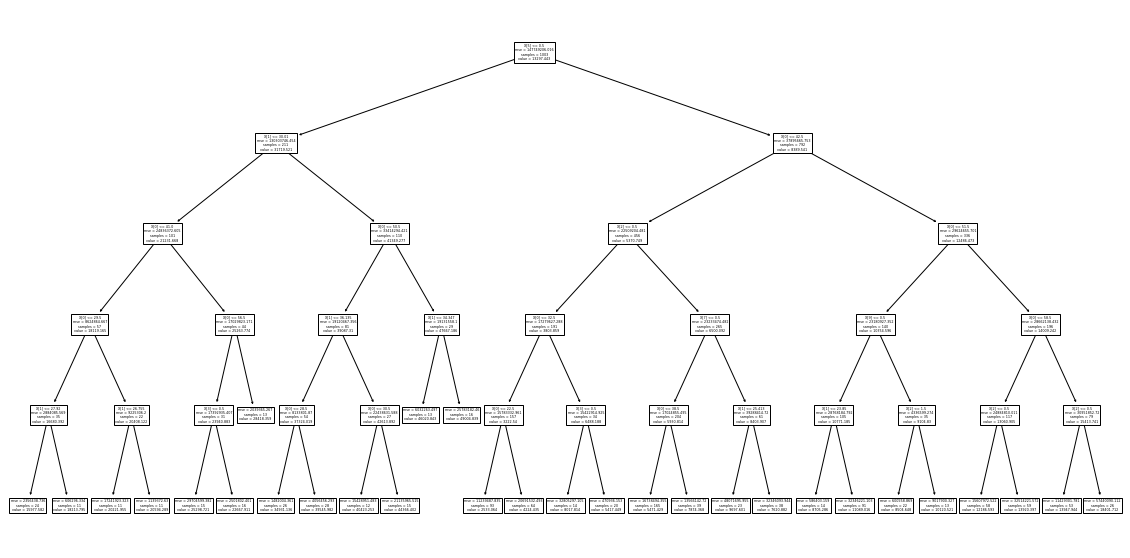

In [532]:
fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
fig = plot_tree(DTOpt, ax=ax)

## 3 pipeline

In [298]:
parametersNew={"dt__splitter":["best","random"],
            "dt__max_depth" : [1,2,3,4,5],
           "dt__min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "dt__min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "dt__max_features":["auto","log2","sqrt",None],
           "dt__max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [299]:
tuning_modelNew = GridSearchCV(my_pipeline,param_grid = parametersNew, scoring='r2',cv=5)

In [ ]:
tuning_modelNew.fit(X_train, y_train)

In [327]:
bestR2New = tuning_modelNew.best_score_
print(bestR2New)
bestParamsNew = tuning_modelNew.best_params_
print(bestParamsNew)

0.7608061968903254
{'dt__max_depth': 4, 'dt__max_features': 'auto', 'dt__max_leaf_nodes': None, 'dt__min_samples_leaf': 1, 'dt__min_weight_fraction_leaf': 0.1, 'dt__splitter': 'best'}


In [331]:
DTNew = DecisionTreeRegressor(max_depth = 4, max_features = 'auto', max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf = 0.1, splitter = 'best')


In [334]:
my_pipelineNew =Pipeline(steps = [
                         ('preprocessor',preprocessor),
                         ('dt',DTNew)
                         ]
                     )
y_hat_DTNew = my_pipelineNew.fit(X_train, y_train).predict(X_test)

(0.0, 55000.0)

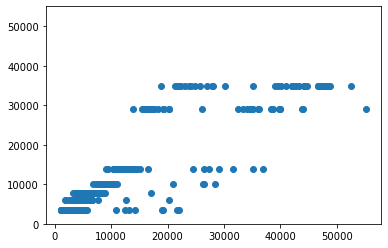

In [340]:
plt.scatter(y_test, y_hat_DTNew)
ax = plt.gca()
ax.set_ylim([0, 55000])

In [423]:
dataNew = {'y_test': y_test,
        'y_hat':y_hat_DTNew}
  
dfNew = pnd.DataFrame(dataNew)

dfNew

,y_test,y_hat
397,16586.49771,7745.195398
338,41919.09700,3558.421608
918,13041.92100,5930.698101
1271,3021.80915,3558.421608
933,7348.14200,10113.446559
...,...,...
374,1391.52870,34897.272566
717,13112.60480,5930.698101
464,1632.03625,13774.022883
863,5458.04645,10113.446559


In [424]:
stats3 = stats(y_test, y_hat_DTNew)

MAE: 11413.139626541011
MSE: 241755168.82531625
RMSE: 15548.478022794265
R2: -0.6915191850194933


## 4 Pipeline

In [473]:
std_slc = StandardScaler()
pca = decomposition.PCA()
d_t = DecisionTreeRegressor()

In [474]:
pipe = Pipeline(steps=[ ('preprocessor',preprocessor),
                        ('std_slc', std_slc),
                        ('pca', pca),
                        ('dt', d_t)])

In [475]:
n_components = list(range(1,6,1))

In [476]:
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
max_depth = [1,2,3,4,5]

In [477]:
parameters4 = dict(pca__n_components=n_components,
                      dt__min_samples_leaf=min_samples_leaf,
                      dt__max_depth=max_depth)

In [485]:
dt4 = GridSearchCV(pipe, parameters4)
y_hat_fit4 = dt4.fit(X_train, y_train)

In [486]:
bestParams4 = dt4.best_params_
bestScore4 = dt4.best_score_

In [487]:
print(bestParams4)
print(bestScore4)

{'dt__max_depth': 5, 'dt__min_samples_leaf': 2, 'pca__n_components': 4}
0.7080657628365709


In [490]:
DT4 = DecisionTreeRegressor(max_depth = 5, min_samples_leaf = 2)

In [491]:
my_pipeline4 =Pipeline(steps = [
                         ('preprocessor',preprocessor),
                         ('dt',DT4)
                         ]
                     )
y_hat_DT4 = my_pipeline4.fit(X_train, y_train).predict(X_test)

(0.0, 65000.0)

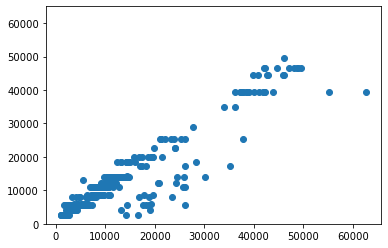

In [495]:
plt.scatter(y_test, y_hat_DT4)
ax = plt.gca()
ax.set_ylim([0, 65000])

In [496]:
data4 = {'y_test': y_test,
        'y_hat':y_hat_DT4}
  
df4 = pnd.DataFrame(data4)

df4

,y_test,y_hat
397,16586.49771,2533.063837
338,41919.09700,39545.981877
918,13041.92100,13947.943918
1271,3021.80915,4224.434537
933,7348.14200,11089.016025
...,...,...
374,1391.52870,2533.063837
717,13112.60480,18401.712334
464,1632.03625,2533.063837
863,5458.04645,13242.404930


In [533]:
stats4 = stats(y_test, y_hat_DT4)

MAE: 2570.979608369775
MSE: 19086225.062912147
RMSE: 4368.778440584067
R2: 0.8664569778574472


In [508]:
print('Model 1')
print(stats1)
print('Model 2')
print(stats2)
print('Model 3')
print(stats3)
print('Model 4')
print(stats4)

Model 1
{'MAE': 2780.8034081761193, 'MSE': 37444023.97650862, 'RMSE': 6119.152226943584, 'R2': 0.7380106277423193}
Model 2
{'MAE': 2745.8670322602707, 'MSE': 19693318.30038361, 'RMSE': 4437.715437067096, 'R2': 0.8622092512699733}
Model 3
{'MAE': 11413.139626541011, 'MSE': 241755168.82531625, 'RMSE': 15548.478022794265, 'R2': -0.6915191850194933}
Model 4
{'MAE': 2570.979608369775, 'MSE': 19086225.062912147, 'RMSE': 4368.778440584067, 'R2': 0.8664569778574472}


In [181]:
# #OHE = OneHotEncoder(handle_unknown='ignore', sparse = False) 
# def impute_values(X):

#     X_cat = X.select_dtypes(include = 'object')
#     cat_cols = X_cat.columns # save attribu

#     X_num = X.select_dtypes(exclude = 'object')
#     num_cols = X_num.columns

#     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
#     X_num = imp.fit_transform(X_num)

#     imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
#     X_cat = imp.fit_transform(X_cat)
#     return (X_num, num_cols, X_cat, cat_cols)

# X_num_train, num_cols_train, X_cat_train, cat_cols_train = impute_values (X_train)

# X_num_test, num_cols_test, X_cat_test, cat_cols_test = impute_values (X_test)

# ohe_fitted = OHE.fit(X_cat_train)

# X_cat_prep_train = ohe_fitted.transform(X_cat_train)
# X_cat_prep_test = ohe_fitted.transform(X_cat_test)

# #spajamo
# X_train = np.concatenate((X_num_train, X_cat_prep_train), axis = 1)
# X_test = np.concatenate((X_num_test, X_cat_prep_test), axis = 1)

